In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
%matplotlib inline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import power_transform
import scipy.stats as stats

In [2]:
df = pd.read_csv("/home/rahul/jupyter prt/kaggle_diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.shape

(2000, 9)

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


In [7]:
df.isna().sum()

# df.isnull().mean()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

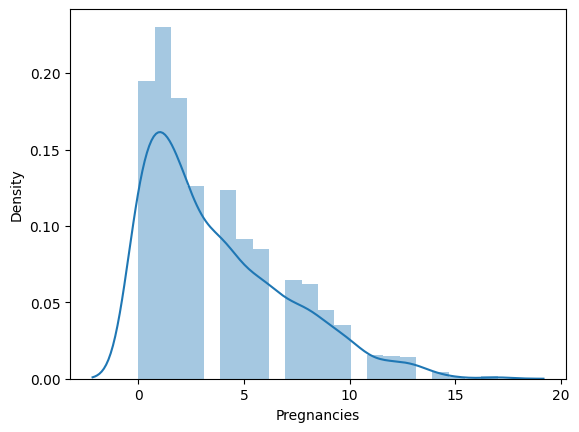

In [20]:
# sns.boxplot(df.Pregnancies)
sns.distplot(df.Pregnancies)
# df.Pregnancies.unique()

# plt.show()

In [10]:
y_box_cox = power_transform(np.expand_dims(df['Pregnancies'], axis=1), method='box-cox').flatten()
sns.distplot(a=y_box_cox, kde=True)

# df.Pregnancies = np.log(df.Pregnancies)

# df.Pregnancies.value_counts()

# df.dropna()

# sns.distplot(df.Pregnancies)

ValueError: The Box-Cox transformation can only be applied to strictly positive data

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

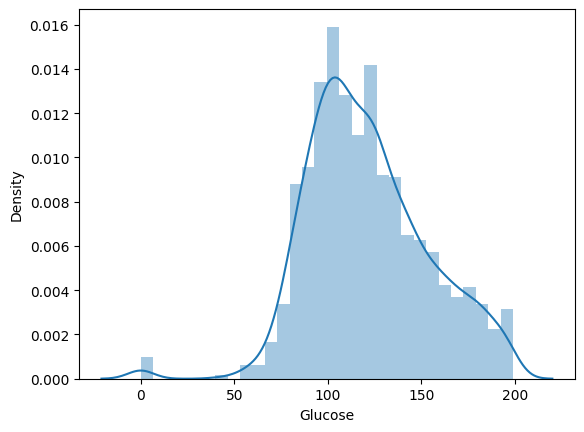

In [11]:
sns.distplot(df.Glucose)

In [12]:
# y_box_cox = power_transform(np.expand_dims(df['Glucose'], axis=1), method='box-cox').flatten()
# sns.distplot(a=y_box_cox, kde=True)
df.Glucose = np.log(df.Glucose)

# sns.distplot(df.Glucose)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

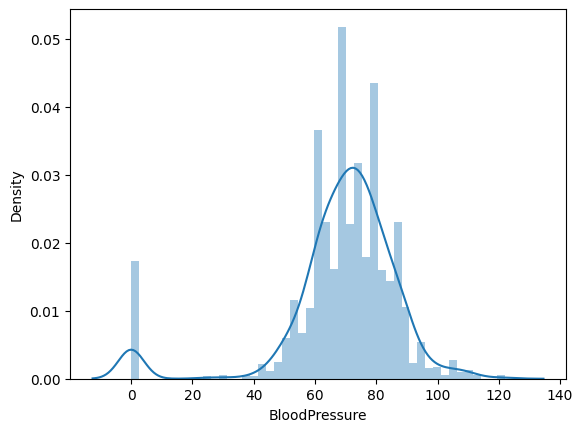

In [13]:
sns.distplot(df.BloodPressure)

In [14]:
df.BloodPressure = np.log(df.BloodPressure)

# sns.distplot(df.BloodPressure)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

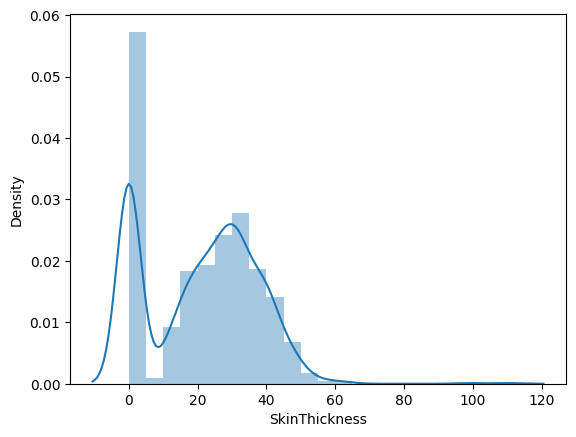

In [15]:
sns.distplot(df.SkinThickness)

In [16]:
df.SkinThickness = np.log(df.SkinThickness)

# sns.distplot(df.SkinThickness)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

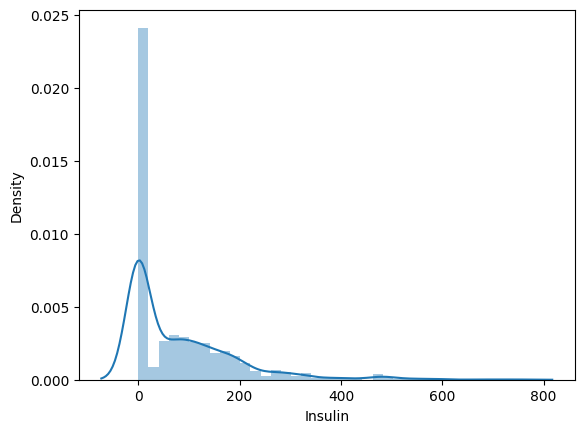

In [18]:
sns.distplot(df.Insulin)

In [19]:
df.Insulin = np.log(df.Insulin)
# sns.distplot(df.Insulin)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

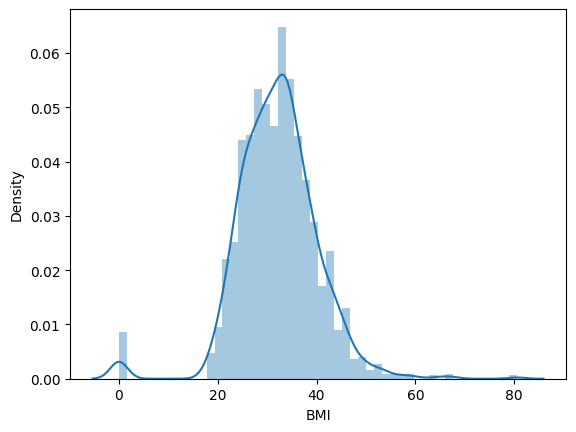

In [20]:
sns.distplot(df.BMI)

In [21]:
df.BMI = np.log(df.BMI)
# y_box_cox = power_transform(np.expand_dims(df['BMI'], axis=1), method='box-cox').flatten()
# sns.distplot(a=y_box_cox, kde=True)

# sns.distplot(df.BMI)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DiabetesPedigreeFunction', ylabel='Density'>

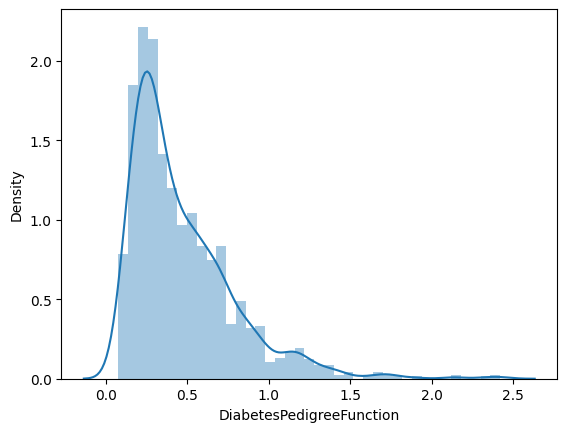

In [22]:
sns.distplot(df.DiabetesPedigreeFunction)

In [23]:
df.DiabetesPedigreeFunction = np.log(df.DiabetesPedigreeFunction)

/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

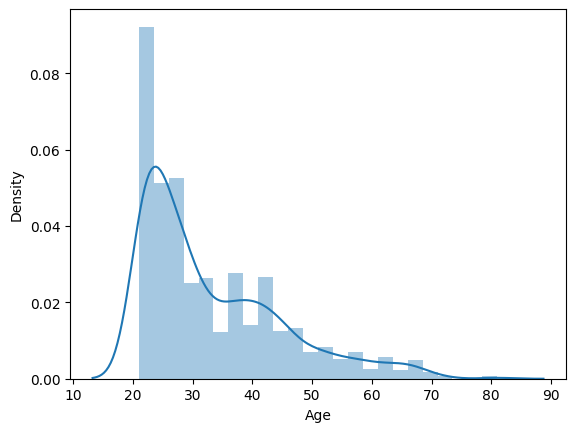

In [24]:
sns.distplot(df.Age)

In [25]:
df.Age = np.log(df.Age)
# sns.distplot(df.Age)

In [26]:
# sns.distplot(df['Age'])

# sns.scatterplot(df['Age'], df['BloodPressure'])

In [27]:
# sns.scatterplot(df['Age'], df['BMI'])

In [28]:
#  plot a pairwise relationships in a dataset.
# sns.pairplot(df)

In [29]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [30]:
# sns.distplot(df['SkinThickness'])

## Exploratory Data Analysis

In [31]:
# from pandas_profiling import ProfileReport

In [32]:
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile

In [33]:
df.drop_duplicates(inplace = True)

<AxesSubplot:>

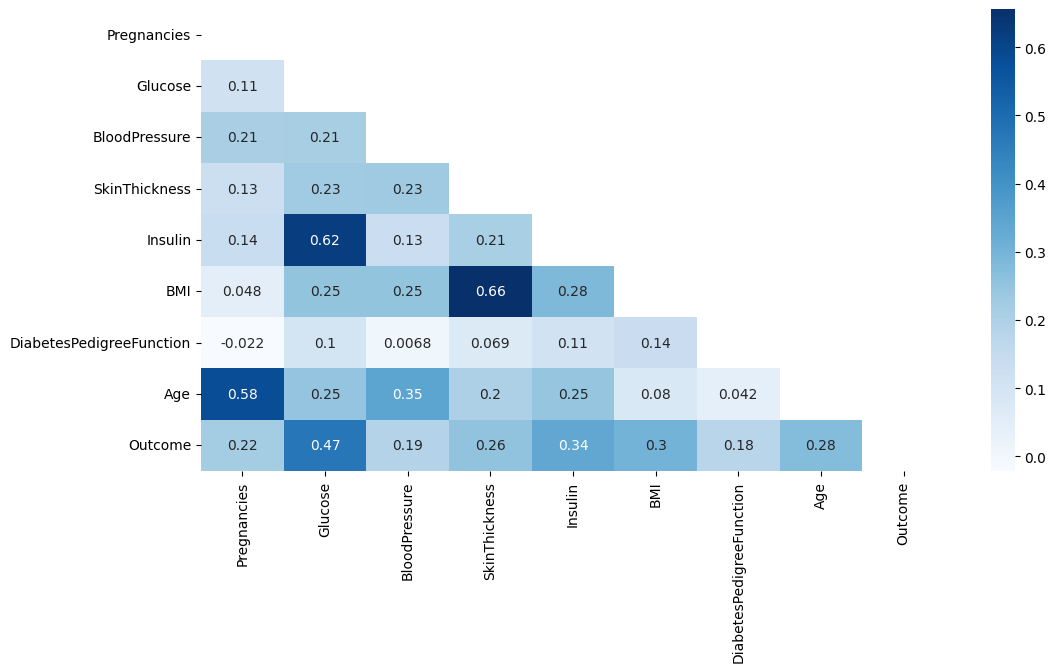

In [34]:
# Correlations
plt.figure(figsize=(12,6))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, cmap='Blues', mask=matrix)

In [35]:
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,2,4.927254,4.127134,3.555348,-inf,3.514526,-2.063568,3.850148
1,0,4.430817,4.406719,3.433987,4.828314,3.642836,-1.456717,3.135494
2,0,4.976734,-inf,-inf,-inf,3.788725,-0.462035,3.433987
3,0,4.905275,4.219508,3.737670,5.521461,3.744787,-1.007858,3.178054
4,1,4.934474,4.127134,3.713572,6.173786,3.706228,-0.623621,3.044522
...,...,...,...,...,...,...,...,...
1564,1,4.605170,4.127134,-inf,-inf,4.165114,-1.883875,3.583519
1565,0,5.093750,3.688879,3.135494,4.158883,3.706228,-1.133204,3.496508
1566,6,4.934474,4.430817,3.610918,-inf,3.925926,-1.139434,3.912023
1567,2,5.117994,3.784190,3.401197,4.941642,3.964615,-0.794073,3.332205


In [36]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state= 2529)

In [37]:
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((558, 8), (186, 8), (558, 1), (186, 1))

In [39]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# SMOTE is one of the most commonly used oversampling methods to solve the imbalance problem.
# SMOTE for Imbalanced Classification
# This is a type of data augmentation for the minority class and is referred to as 
# the Synthetic Minority Oversampling Technique, or SMOTE for short.

# from imblearn.over_sampling import SMOTE
# os = SMOTE(random_state=42)
# X_train,y_train = os.fit_resample(X_train, y_train.ravel())

## LogisticRegression

In [41]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
y_pred_test = logreg.predict(X_test)

y_pred_test

print(accuracy_score(y_test, y_pred_test))

In [ ]:
# probability of getting output as 0 - rain

# logreg.predict_proba(X_test)[:,0]

In [ ]:
# probability of getting output as 1 - rain

# logreg.predict_proba(X_test)[:,1]

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[0:15]

y_pred_prob

## DecisionTreeClassifier

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)
y_pred_gini

print(accuracy_score(y_test, y_pred_gini))

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

In [ ]:
# plt.figure(figsize=(12,8))

# from sklearn import tree

# tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

In [ ]:
y_pred_en = clf_en.predict(X_test)
# y_pred_en

In [ ]:

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))
print(accuracy_score(y_test, y_pred_en))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

##  naive_bayes (GaussianNB)

In [ ]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)

In [ ]:
y_pred1 = gnb.predict(X_test)

# y_pred

In [ ]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred1)))
print(accuracy_score(y_test, y_pred1))

In [ ]:
# # Print the Confusion Matrix and slice it into four pieces

# from sklearn.metrics import confusion_matrix

# cm = confusion_matrix(y_test, y_pred)

# print('Confusion matrix\n\n', cm)

# print('\nTrue Positives(TP) = ', cm[0,0])

# print('\nTrue Negatives(TN) = ', cm[1,1])

# print('\nFalse Positives(FP) = ', cm[0,1])

# print('\nFalse Negatives(FN) = ', cm[1,0])

## The confusion matrix shows 368 + 149 = 571 correct predictions and 65 + 78 = 143 incorrect predictions.

In [ ]:
# # visualize confusion matrix with seaborn heatmap

# cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
#                                  index=['Predict Positive:1', 'Predict Negative:0'])

# sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
# from sklearn.metrics import classification_report

# print(classification_report(y_test, y_pred))



In [ ]:
# TP = cm[0,0]
# TN = cm[1,1]
# FP = cm[0,1]
# FN = cm[1,0]

In [ ]:
# classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

# print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))


In [ ]:
# # print classification error

# classification_error = (FP + FN) / float(TP + TN + FP + FN)

# print('Classification error : {0:0.4f}'.format(classification_error))

In [ ]:
# print precision score

# precision = TP / float(TP + FP)


# print('Precision : {0:0.4f}'.format(precision))

# recall = TP / float(TP + FN)

# print('Recall or Sensitivity : {0:0.4f}'.format(recall))

In [ ]:
# true_positive_rate = TP / float(TP + FN)


# print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

# false_positive_rate = FP / float(FP + TN)


# print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

In [ ]:
# specificity = TN / (TN + FP)

# print('Specificity : {0:0.4f}'.format(specificity))

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.01, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

In [ ]:
xgb_preds = xgb.predict(X_test)

In [ ]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, xgb_preds)}")

In [ ]:
xgb_preds
print(accuracy_score(y_test, xgb_preds))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(xgb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(xgb.score(X_test, y_test)))

## RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=80)
rfc.fit(X_train, y_train)
prediction3 = rfc.predict(X_test)
print(accuracy_score(y_test, prediction3))

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction3))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction3))

In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

In [ ]:
# rfc.predict_proba(X_test)[:,0]
# rfc.predict_proba(X_test)[:,1]

In [ ]:
y_pred_prob1 = rfc.predict_proba(X_test)[122:127]

y_pred_prob1

In [ ]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob1, columns=['Prob of - No diabetes (0)', 'Prob of - yes diabestes (1)'])

y_pred_prob_df

In [ ]:
# n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num=10)] 
# max_features = ['auto', 'sqrt']
# max_depth = [2,4]
# min_samples_split = [2,5]
# min_samples_leaf = [1,2]
# bootstrap = [True, False]

In [ ]:
# param_grid = {'n_estimators': n_estimators,
#               'max_features': max_features,
#               'max_depth': max_depth,
#               'min_samples_split': min_samples_split,
#               'min_samples_leaf': min_samples_leaf,
#               'bootstrap': bootstrap}

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, verbose=3, cv=5, n_jobs = 4)

In [ ]:
# grid_search.fit(X_train, y_train)

In [ ]:
# grid_predictions = grid_search.predict(X_test)
# print(accuracy_score(y_test, grid_predictions))

In [ ]:
# print("Confusion Matrix: \n", confusion_matrix(y_test, grid_predictions))
# print("\n")
# print(classification_report(y_test, grid_predictions))

## KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction2 = knn.predict(X_test)

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test, prediction2))
print('\n')
print('Classification Report:\n', classification_report(y_test, prediction2))

In [ ]:
print(accuracy_score(y_test, prediction3))

In [ ]:
print('Training set score: {:.4f}'.format(knn.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(knn.score(X_test, y_test)))

## Support Vector Machines

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
predictions4 = svc_model.predict(X_test)

In [ ]:
print('Confusion Matrix:\n', confusion_matrix(y_test, predictions4))
print('\n')
print('Classification Report:\n', classification_report(y_test, predictions4))

In [ ]:
print(accuracy_score(y_test, predictions4))

In [ ]:
print('Training set score: {:.4f}'.format(svc_model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc_model.score(X_test, y_test)))

## VotingClassifier

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('XGboost', xgb), ('Random Forest', rfc), 
               ('Logistic', logreg), ('KNN', knn), ('SVM', svc_model),
               ('Decisioin tree Gini',clf_gini),('Decisioin tree Entropy', clf_en),('naive_bayes GaussianNB',gnb)]

In [ ]:
vc = VotingClassifier(estimators = classifiers)

In [ ]:
vc.fit(X_train, y_train)

In [ ]:
vc_preds = vc.predict(X_test)
print(accuracy_score(y_test, vc_preds))

In [ ]:
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, vc_preds)}\n")
print(f"Classification Report :- \n {classification_report(y_test, vc_preds)}")

In [ ]:
print('1 The accuracy score of Logistic Regression Model is: ', accuracy_score(y_test, y_pred_test)*100,'%')
print('2 The accuracy score of K Nearest Neighbors Model is: ', accuracy_score(y_test, prediction2)*100,'%')
print('3 The accuracy score of Random Forests Model is: ', accuracy_score(y_test, prediction3)*100,'%')
print('4 The accuracy score of SVM Model is: ', accuracy_score(y_test, predictions4)*100,'%')
print('5 The accuracy score of XG Boost  is: ', accuracy_score(y_test, xgb_preds)*100,'%')
print('6 The accuracy score of naive_bayes GaussianNB  is: ', accuracy_score(y_test, y_pred1)*100,'%')
print('7 The accuracy score of Decisioin tree Gini  is: ', accuracy_score(y_test, y_pred_gini)*100,'%')
print('8 The accuracy score of Decisioin tree Entropy is: ', accuracy_score(y_test, y_pred_en)*100,'%')



print('9 The accuracy score of Voting Classifer  is: ', accuracy_score(y_test, vc_preds)*100,'%')

In [ ]:
lr_acc = accuracy_score(y_test, y_pred_test)
knn_acc = accuracy_score(y_test, prediction2)
rfc_acc = accuracy_score(y_test, prediction3)
SVM_acc = accuracy_score(y_test, predictions4)
xgb_acc = accuracy_score(y_test, xgb_preds)
nv_gaussn = accuracy_score(y_test, vc_preds)
dc_gni = accuracy_score(y_test, y_pred_gini)
dc_ent = accuracy_score(y_test, y_pred_en)


vc_acc = accuracy_score(y_test, vc_preds)

In [ ]:
model = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forests', 'Support Vector Machines',
         'XGBoost', 'Naive Bayes GaussianNB', 'Decision Tree Gini', 'Decision Tree Entropoy', 'Voting Classifier']
score = [lr_acc, knn_acc, rfc_acc, SVM_acc, xgb_acc, nv_gaussn, dc_gni ,dc_ent, vc_acc]

In [ ]:
plt.figure(figsize = (17, 6))
sns.barplot(x = score, y = model, palette = 'magma')
plt.show()

In [ ]:
import joblib

In [ ]:
joblib.dump('diabet.joblib')

In [ ]:
-16%3